#Task + Dataset Link

Task 3 (Heart Disease Prediction) - DevelopersHub Internship
Dataset (Kaggle): https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
Original UCI info: https://archive.ics.uci.edu/ml/datasets/heart+disease

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the CSV File

In [2]:
import os
import pandas as pd

csv_file = "/content/drive/MyDrive/Task_3/heart_disease_uci.csv"

if os.path.exists(csv_file):
    print("✅ Loading dataset from Google Drive...")
    df = pd.read_csv(csv_file)
else:
    print("⚠️ Drive dataset not found. Using Kaggle download route instead...")
    # (Insert Kaggle download code here)


✅ Loading dataset from Google Drive...


#Basic Inspection (.info, .describe, missing values)

In [3]:
import numpy as np

print("Columns:\n", df.columns.tolist())
print("\n--- INFO ---")
display(df.info())

print("\n--- DESCRIBE ---")
display(df.describe(include="all").T)

print("\n--- Missing Values (raw) ---")
display(df.isna().sum().sort_values(ascending=False).head(20))


Columns:
 ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), obj

None


--- DESCRIBE ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,920.0,NaN,NaN,NaN,460.5,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,Male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,920,4,Cleveland,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,861.0,NaN,NaN,NaN,132.132404,19.06607,0.0,120.0,130.0,140.0,200.0
chol,890.0,NaN,NaN,NaN,199.130337,110.78081,0.0,175.0,223.0,268.0,603.0
fbs,830,2,False,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,918,3,normal,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,865.0,NaN,NaN,NaN,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0



--- Missing Values (raw) ---


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


**Explanation:**
This is required for understanding the dataset structure:

columns and datatypes

summary stats

missing values count

#Clean Data (Handle '?' + Convert to Numeric + Impute Missing)

In [6]:
# =========================
# Cell 8 — Clean Data + Preprocessor (Robust Fix)
# =========================

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

df_clean = df.copy()

# 1) Replace '?' with real missing values
df_clean = df_clean.replace("?", np.nan)

# 2) Detect target column (same logic as before)
possible_targets = ["target", "Target", "output", "Output", "heart_disease", "HeartDisease", "num"]
target_col = None
for t in possible_targets:
    if t in df_clean.columns:
        target_col = t
        break

if target_col is None:
    raise ValueError(f"❌ Could not find target column. Available columns: {df_clean.columns.tolist()}")

print("✅ Detected target column:", target_col)

# 3) Convert target to binary if it's the UCI 'num' column (0..4 => 0/1)
y = df_clean[target_col]
if target_col.lower() == "num":
    y = (pd.to_numeric(y, errors="coerce") > 0).astype(int)
else:
    y = pd.to_numeric(y, errors="coerce").astype(int)

# 4) Features
X_raw = df_clean.drop(columns=[target_col])

# 5) Drop columns that are completely missing (cannot be imputed)
all_missing_cols = [c for c in X_raw.columns if X_raw[c].isna().all()]
if all_missing_cols:
    print("⚠️ Dropping 100% missing columns:", all_missing_cols)
    X_raw = X_raw.drop(columns=all_missing_cols)

# 6) Smart numeric conversion:
#    For object columns, try converting to numeric ONLY if it keeps enough real values.
for col in X_raw.columns:
    if X_raw[col].dtype == "object":
        converted = pd.to_numeric(X_raw[col], errors="coerce")
        # If most values become numeric, treat as numeric; otherwise keep as categorical
        if converted.notna().mean() >= 0.80:
            X_raw[col] = converted

# 7) Identify numeric vs categorical columns (after smart conversion)
numeric_features = X_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = [c for c in X_raw.columns if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# 8) Build preprocessing (DO NOT fit here; we fit only on training data later)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

print("✅ Preprocessor ready. Next: split data and train models using this preprocessor.")


✅ Detected target column: num
Numeric features: ['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']
Categorical features: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
✅ Preprocessor ready. Next: split data and train models using this preprocessor.


#EDA (Distributions + Correlation Heatmap)

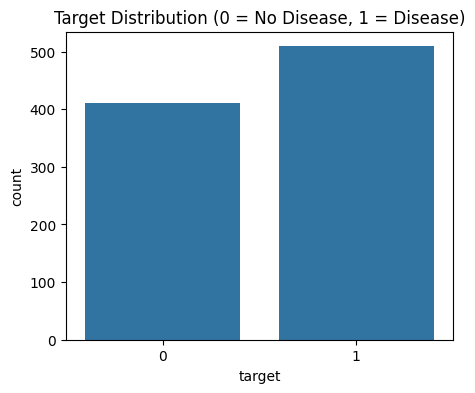

In [9]:
# =========================
# Cell 9 — EDA (Target, Numeric Correlation, Distributions, Categorical Breakdown)
# =========================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine raw features + target for EDA
eda_df = X_raw.copy()
eda_df["target"] = y.values

# -------------------------
# 1) Target distribution
# -------------------------
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=eda_df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()


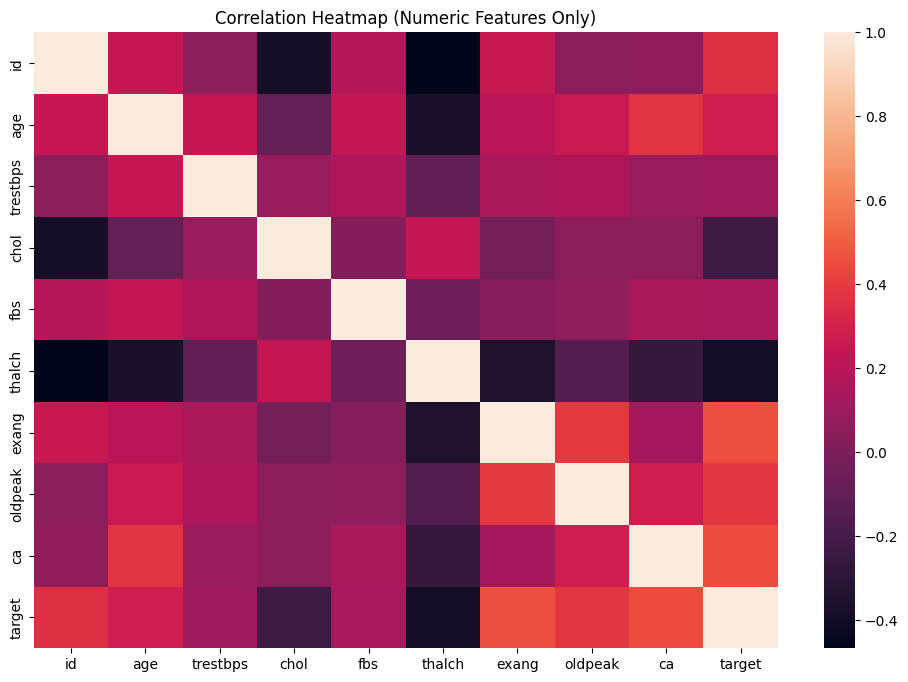

In [11]:
# -------------------------
# 2) Correlation heatmap (NUMERIC ONLY)
# -------------------------
numeric_df = eda_df.select_dtypes(include=["int64", "float64"]).copy()

plt.figure(figsize=(12,8))
corr = numeric_df.corr(numeric_only=True)
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


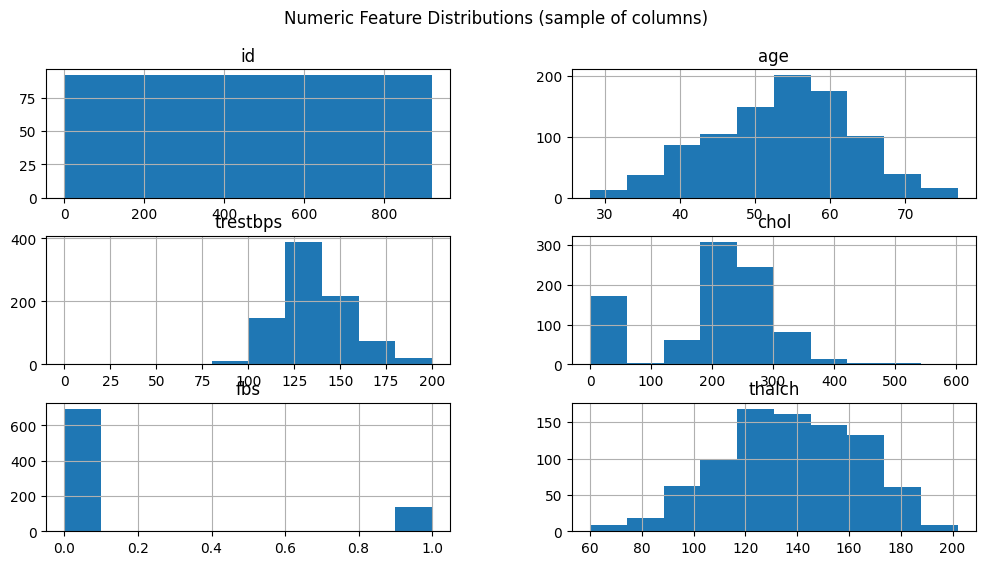

In [12]:
# -------------------------
# 3) Numeric feature distributions (first few numeric columns)
# -------------------------
num_cols = eda_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c != "target"]  # exclude target

cols_to_plot = num_cols[:6]  # plot first 6 numeric features (readable)

if len(cols_to_plot) > 0:
    eda_df[cols_to_plot].hist(figsize=(12,6))
    plt.suptitle("Numeric Feature Distributions (sample of columns)")
    plt.show()
else:
    print("No numeric columns found for distribution plots.")

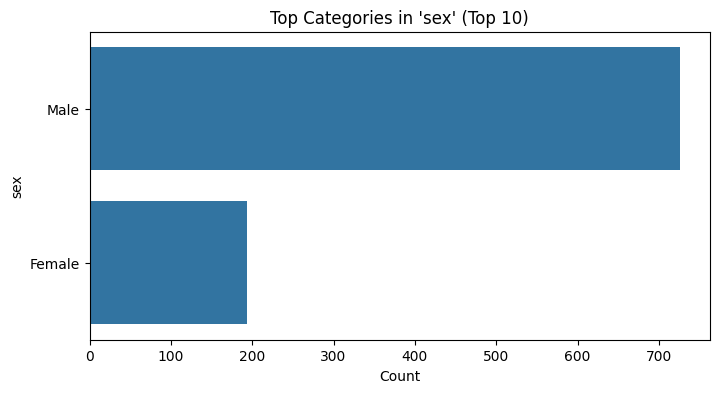

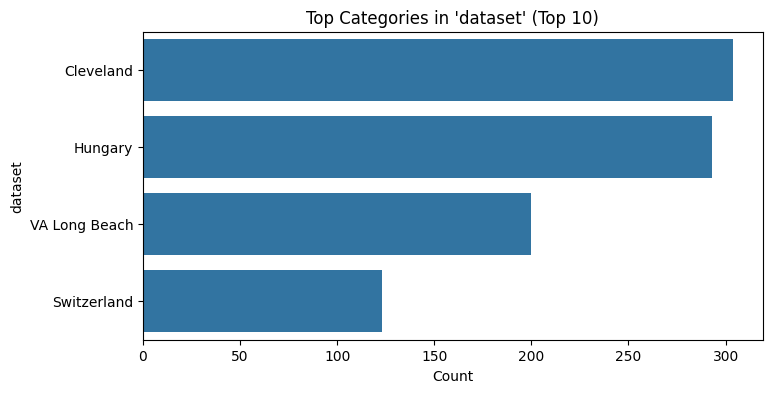

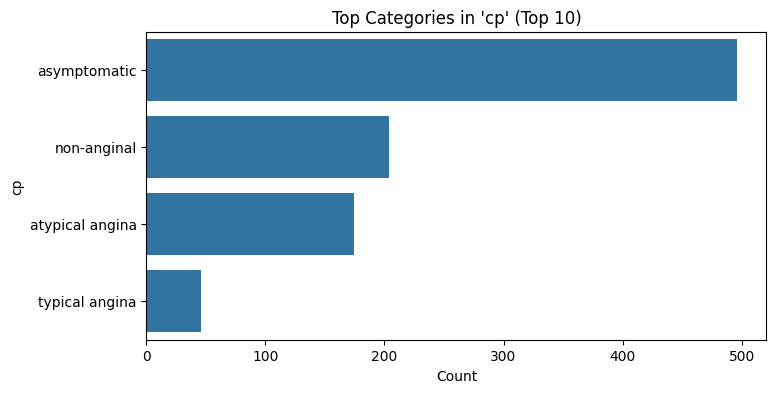

In [13]:
# -------------------------
# 4) Categorical feature breakdown (Top categories)
# -------------------------
cat_cols = eda_df.select_dtypes(include=["object", "category"]).columns.tolist()

# If you have categorical columns, show distributions for first 3 (to keep it neat)
cat_cols = [c for c in cat_cols if c != "target"]
cat_cols_to_plot = cat_cols[:3]

for col in cat_cols_to_plot:
    plt.figure(figsize=(8,4))
    # countplot works best when categories aren't too many
    sns.countplot(y=col, data=eda_df, order=eda_df[col].value_counts().index[:10])
    plt.title(f"Top Categories in '{col}' (Top 10)")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

**Explanation:**
Because we updated cleaning to use X_raw (mixed numeric + categorical) and preprocessing later, EDA must also adapt:

Target Distribution: same as before

Correlation Heatmap: computed on numeric columns only, otherwise correlation breaks or becomes meaningless

Histograms: shown only for numeric columns (first 6)

Categorical Distributions: plots top categories for a few categorical columns (optional but useful)

#Train/Test Split + Models

In [15]:
# =========================
# Cell 10 — Split + Build Models (with Preprocessing)
# =========================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Split raw features (mixed numeric/categorical) safely
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression: needs scaling for numeric part after preprocessing
log_reg_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("scaler", StandardScaler()),  # scales after one-hot; ok for small datasets
    ("clf", LogisticRegression(max_iter=2000, random_state=42))
])

# Decision Tree: scaling not needed
tree_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42, max_depth=4))
])

# Train
log_reg_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print("Models trained successfully with robust preprocessing.")


Models trained successfully with robust preprocessing.


**Explanation:**
This cell trains the two allowed models for the task:

Logistic Regression

Decision Tree

#Evaluate Models (Accuracy + Confusion Matrix + ROC Curve)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)

    # Probabilities for ROC (some models may not have predict_proba)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # fallback (rare here)
        y_proba = y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n=== {model_name} ===")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC :", round(auc, 4))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

    return acc, auc



=== Logistic Regression ===
Accuracy: 0.8696
ROC-AUC : 0.9352


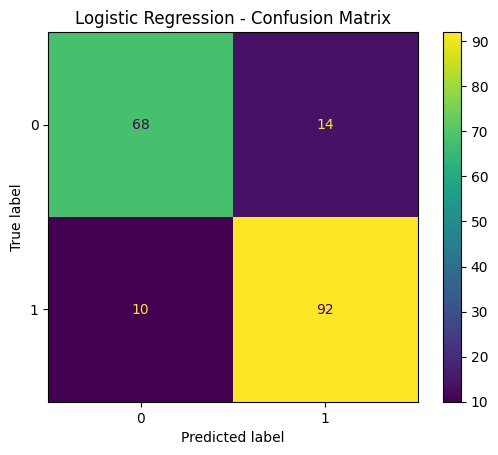

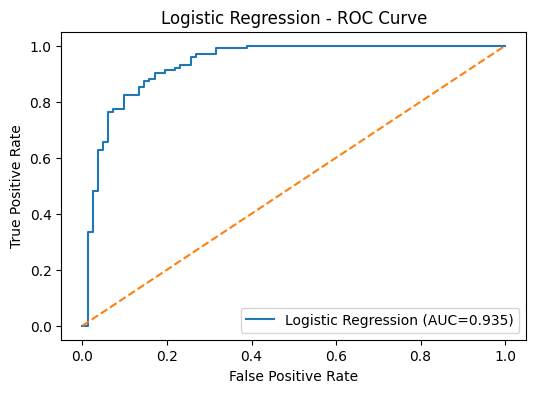

In [20]:
log_acc, log_auc = evaluate_model(log_reg_model, X_test, y_test, "Logistic Regression")


=== Decision Tree ===
Accuracy: 0.8587
ROC-AUC : 0.9204


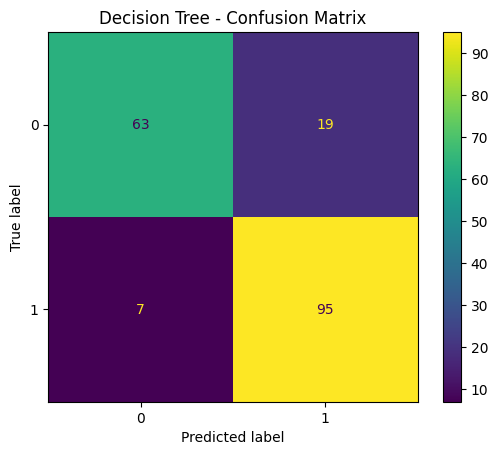

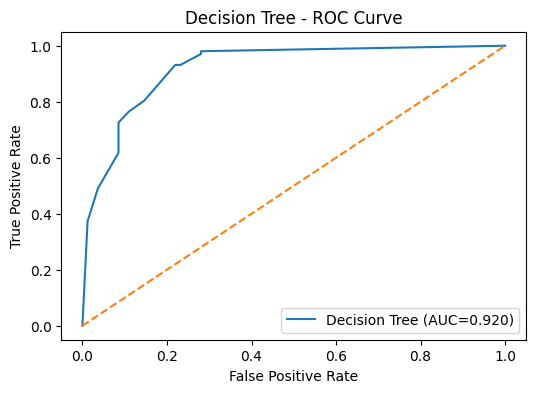

In [18]:
tree_acc, tree_auc = evaluate_model(tree_model, X_test, y_test, "Decision Tree")

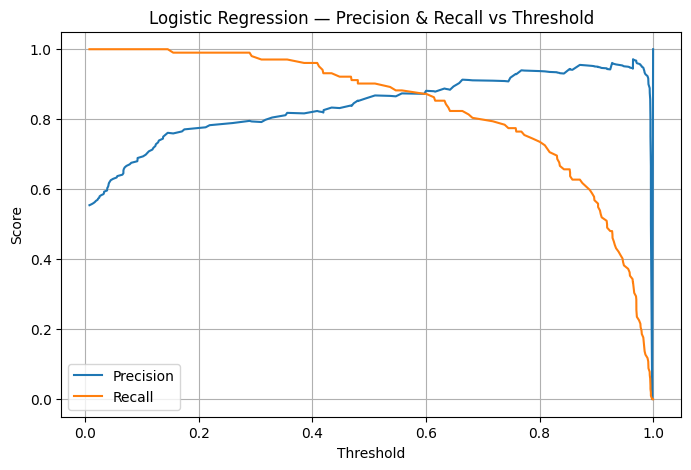

✅ Chosen threshold (to reach Recall ≥ 0.9): 0.510
✅ Chosen threshold (max F1): 0.356  |  Best F1: 0.8879

=== Logistic Regression @ DEFAULT (0.5) threshold = 0.500 ===
Precision: 0.8679
Recall   : 0.9020
F1-score : 0.8846


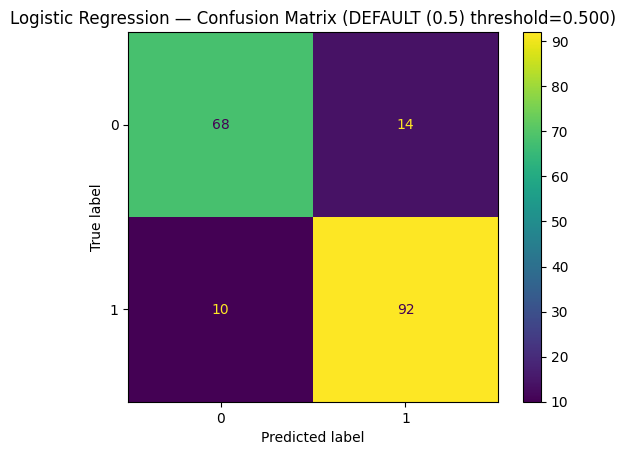


=== Logistic Regression @ RECALL≥0.9 threshold = 0.510 ===
Precision: 0.8679
Recall   : 0.9020
F1-score : 0.8846


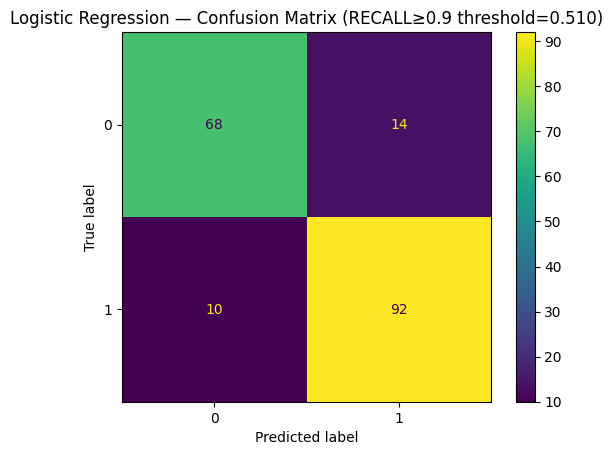


=== Logistic Regression @ BEST F1 threshold = 0.356 ===
Precision: 0.8182
Recall   : 0.9706
F1-score : 0.8879


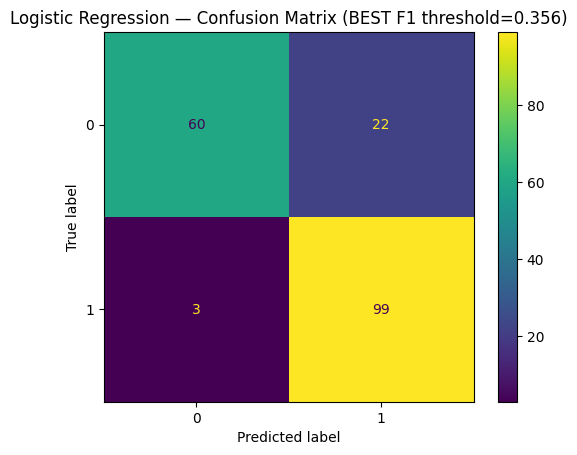

In [21]:
# =========================
# Cell 14 — Threshold Tuning (focus on Recall / fewer False Negatives)
# =========================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# ---- Choose which model to tune ----
# You can switch this to tree_model if you want to tune Decision Tree instead.
model_to_tune = log_reg_model
model_name = "Logistic Regression"

# ---- Get predicted probabilities on the test set ----
# (Works for both Logistic Regression and Decision Tree in our pipelines)
y_proba = model_to_tune.predict_proba(X_test)[:, 1]

# ---- Compute precision-recall values for many thresholds ----
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# precision_recall_curve returns thresholds of length (n-1)
# so we align arrays for plotting and selection:
thresholds_plot = np.append(thresholds, 1.0)

# ---- Plot Precision & Recall vs Threshold ----
plt.figure(figsize=(8, 5))
plt.plot(thresholds_plot, precisions, label="Precision")
plt.plot(thresholds_plot, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f"{model_name} — Precision & Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# ---- Option A: pick threshold to achieve a minimum Recall ----
# In medical screening tasks, high recall is often important (fewer false negatives).
TARGET_RECALL = 0.90

# Find the first threshold where recall is at least TARGET_RECALL
idx = np.where(recalls >= TARGET_RECALL)[0]

if len(idx) == 0:
    print(f"⚠️ No threshold found achieving Recall >= {TARGET_RECALL}.")
    print("Try lowering TARGET_RECALL (e.g., 0.85) or check class imbalance.")
    chosen_threshold_recall = 0.5
else:
    chosen_threshold_recall = thresholds_plot[idx[-1]]  # higher threshold while keeping recall >= target

print(f"✅ Chosen threshold (to reach Recall ≥ {TARGET_RECALL}): {chosen_threshold_recall:.3f}")

# ---- Option B: pick threshold that maximizes F1 score ----
f1_scores = []
for t in thresholds_plot:
    y_pred_t = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_f1_idx = int(np.argmax(f1_scores))
chosen_threshold_f1 = thresholds_plot[best_f1_idx]

print(f"✅ Chosen threshold (max F1): {chosen_threshold_f1:.3f}  |  Best F1: {f1_scores[best_f1_idx]:.4f}")

# ---- Evaluate chosen thresholds ----
def evaluate_threshold(threshold, label):
    y_pred = (y_proba >= threshold).astype(int)

    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n=== {model_name} @ {label} threshold = {threshold:.3f} ===")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} — Confusion Matrix ({label} threshold={threshold:.3f})")
    plt.show()

# Default threshold evaluation (0.5)
evaluate_threshold(0.5, "DEFAULT (0.5)")

# Recall-focused threshold evaluation
evaluate_threshold(chosen_threshold_recall, f"RECALL≥{TARGET_RECALL}")

# F1-max threshold evaluation
evaluate_threshold(chosen_threshold_f1, "BEST F1")


#Feature Importance

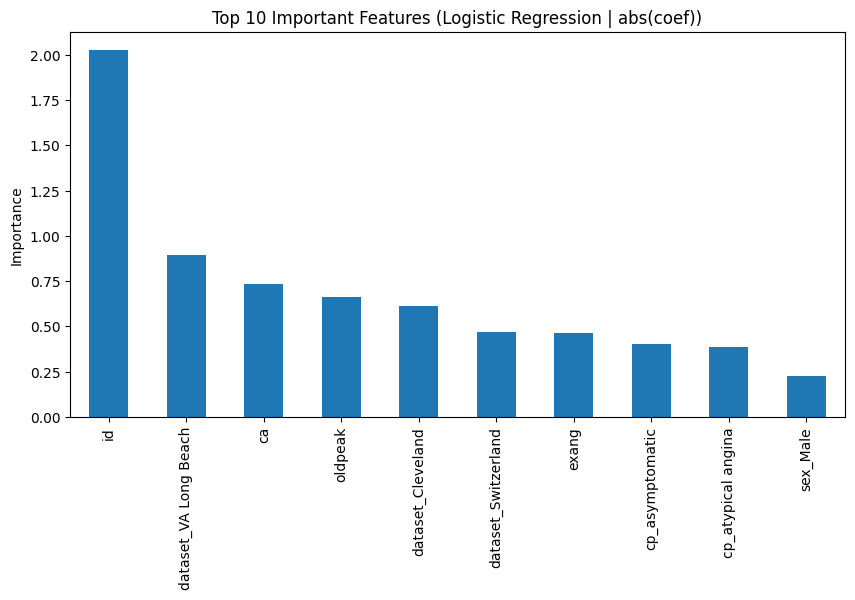

,abs(coef)
id,2.026031
dataset_VA Long Beach,0.893656
ca,0.735949
oldpeak,0.661264
dataset_Cleveland,0.612444
dataset_Switzerland,0.468929
exang,0.465196
cp_asymptomatic,0.401035
cp_atypical angina,0.388910
sex_Male,0.224930


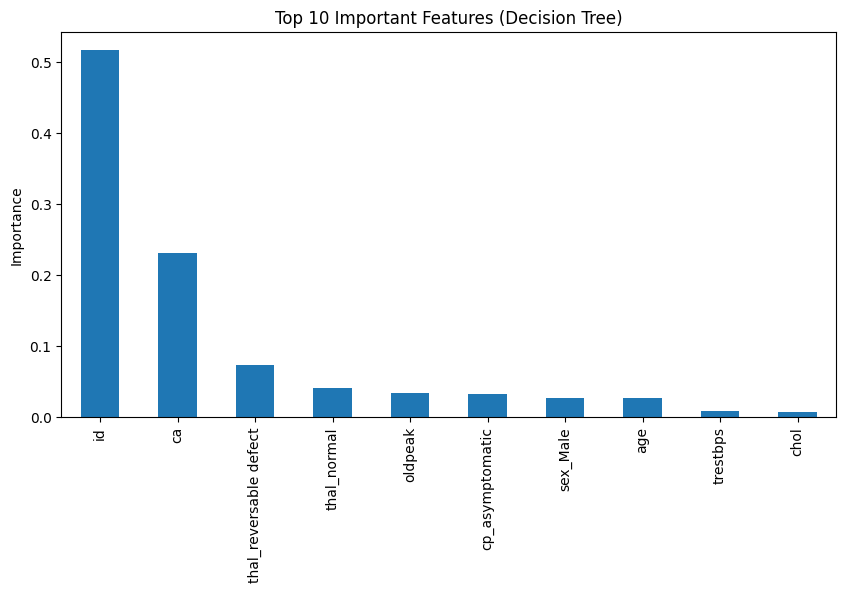

,tree_importance
id,0.516333
ca,0.230829
thal_reversable defect,0.072188
thal_normal,0.039662
oldpeak,0.033056
cp_asymptomatic,0.031451
sex_Male,0.026011
age,0.025723
trestbps,0.007495
chol,0.007148


In [22]:
# =========================
# Cell 12 — Feature Importance (after One-Hot Encoding)
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_feature_names(preprocessor):
    """Return the final feature names after ColumnTransformer (including one-hot names)."""
    num_features = preprocessor.named_transformers_["num"].get_feature_names_out()
    cat_ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    cat_features = preprocessor.named_transformers_["cat"].named_steps["imputer"].feature_names_in_
    cat_feature_names = cat_ohe.get_feature_names_out(cat_features)
    return np.concatenate([num_features, cat_feature_names])

# ---- Logistic Regression importance (abs coefficients) ----
log_pre = log_reg_model.named_steps["preprocess"]
feature_names = get_feature_names(log_pre)

log_clf = log_reg_model.named_steps["clf"]
log_importance = pd.Series(np.abs(log_clf.coef_[0]), index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
log_importance.head(10).plot(kind="bar")
plt.title("Top 10 Important Features (Logistic Regression | abs(coef))")
plt.ylabel("Importance")
plt.show()

display(log_importance.head(15).to_frame("abs(coef)"))

# ---- Decision Tree importance ----
tree_pre = tree_model.named_steps["preprocess"]
tree_feature_names = get_feature_names(tree_pre)

tree_clf = tree_model.named_steps["clf"]
tree_importance = pd.Series(tree_clf.feature_importances_, index=tree_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
tree_importance.head(10).plot(kind="bar")
plt.title("Top 10 Important Features (Decision Tree)")
plt.ylabel("Importance")
plt.show()

display(tree_importance.head(15).to_frame("tree_importance"))


#Saving Best Model

In [23]:
import joblib
import os

# Pick model by ROC-AUC (you can change this rule if needed)
best_model = log_reg_model if log_auc >= tree_auc else tree_model
best_name = "logistic_regression" if log_auc >= tree_auc else "decision_tree"

save_dir = "/content/drive/MyDrive/Task_3/"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, f"heart_disease_{best_name}.joblib")
joblib.dump(best_model, model_path)

print("✅ Saved best model to:", model_path)


✅ Saved best model to: /content/drive/MyDrive/Task_3/heart_disease_logistic_regression.joblib
